In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [73]:
fnames=glob.glob('data/sub-*_grasp-bar_forced*')
df_forced_blue=pd.DataFrame()
df_forced_yellow=pd.DataFrame()
for fname in fnames:
    df=pd.read_csv(fname)
    df_blue = df[df['colour'] == 'blue'].groupby(['angle']).mean(numeric_only=True)
    first_row_blue=pd.DataFrame({'age':df_blue.iloc[0][0],'trial':df_blue.iloc[0][1],'rating':df_blue.iloc[0][2]},index=[360])
    first_row_blue.index.name = 'angle'
    df_forced_blue=pd.concat([df_forced_blue,df_blue])
    
    df_yellow = df[df['colour'] == 'yellow'].groupby(['angle']).mean(numeric_only=True)
    first_row_yellow=pd.DataFrame({'age':df_yellow.iloc[0][0],'trial':df_yellow.iloc[0][1],'rating':df_yellow.iloc[0][2]},index=[360])
    first_row_yellow.index.name = 'angle'
    df_forced_yellow=pd.concat([df_forced_yellow,df_yellow])
    
    df_blue.index+=180
    df_forced_yellow=pd.concat([df_forced_yellow,df_blue])
    df_forced_yellow=pd.concat([df_forced_yellow,first_row_yellow])
    
    df_yellow.index+=180
    df_forced_blue=pd.concat([df_forced_blue,df_yellow])
    df_forced_blue=pd.concat([df_forced_blue,first_row_blue])
    
    
fnames=glob.glob('data/sub-*_grasp-bar_free*')

df_free_choice=pd.DataFrame()
df_free_rating=pd.DataFrame()
for fname in fnames:
    df=pd.read_csv(fname)
    
    df['yellow']=(df['colour']=='yellow')
    df['blue']=(df['colour']=='blue')
    df_sum = df.groupby(['angle']).mean(numeric_only=True)
    first_row=pd.DataFrame({'age':df_sum.iloc[0][0],'trial':df_sum.iloc[0][1],'yellow':df_sum.iloc[0][3],'blue':df_sum.iloc[0][4]},index=[360])
    first_row.index.name = 'angle'
    df_free_choice=pd.concat([df_free_choice,df_sum])
    df_sum.index+=180
    df_sum['yellow']=1-df_sum['yellow']
    df_sum['blue']=1-df_sum['blue']
    df_free_choice=pd.concat([df_free_choice,df_sum])
    df_free_choice=pd.concat([df_free_choice,first_row])
    
    df_rating = df.groupby(['angle']).mean(numeric_only=True)
    first_row=pd.DataFrame({'age':df_rating.iloc[0][0],'trial':df_rating.iloc[0][1],'rating':df_rating.iloc[0][2],'yellow':df_rating.iloc[0][3],'blue':df_rating.iloc[0][4]},index=[360])
    first_row.index.name = 'angle'
    df_free_rating=pd.concat([df_free_rating,df_rating])
    df_rating.index+=180
    df_free_rating=pd.concat([df_free_rating,df_rating])
    df_free_rating=pd.concat([df_free_rating,first_row])
    

In [74]:
df_rating

,age,trial,rating,yellow,blue
angle,,,,,
180,24.0,10.333333,8.666667,0.333333,0.666667
200,24.0,16.666667,6.666667,0.000000,1.000000
220,24.0,13.000000,6.666667,0.000000,1.000000
240,24.0,21.000000,7.000000,0.666667,0.333333
260,24.0,15.000000,8.666667,1.000000,0.000000
270,24.0,5.000000,10.000000,1.000000,0.000000
280,24.0,11.666667,10.000000,1.000000,0.000000
300,24.0,19.333333,9.000000,1.000000,0.000000
320,24.0,18.333333,8.666667,1.000000,0.000000


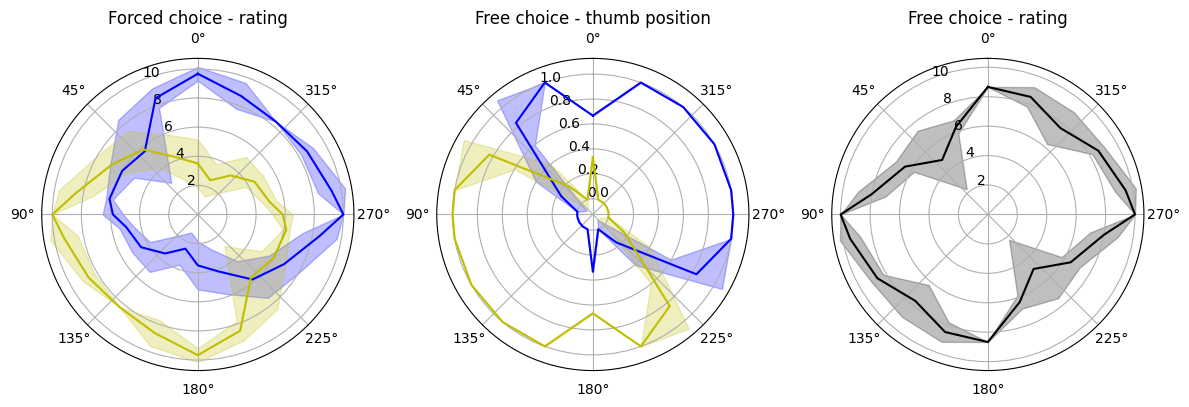

In [75]:
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3, subplot_kw={'projection': 'polar'})
df_blue_m = df_forced_blue.groupby(['angle']).mean(numeric_only=True)
df_blue_sd = df_forced_blue.groupby(['angle']).std()
angles=np.array([math.radians(x) for x in df_blue_m.index])
ax[0].plot(angles, df_blue_m['rating'],'b')
ax[0].fill_between(angles,(df_blue_m['rating']-df_blue_sd['rating']),(df_blue_m['rating']+df_blue_sd['rating']),color='b',alpha=.25)
df_yellow_m = df_forced_yellow.groupby(['angle']).mean(numeric_only=True)
df_yellow_sd = df_forced_yellow.groupby(['angle']).std()
angles=np.array([math.radians(x) for x in df_yellow_m.index])
ax[0].plot(angles, df_yellow_m['rating'],'y')
ax[0].fill_between(angles,(df_yellow_m['rating']-df_yellow_sd['rating']),(df_yellow_m['rating']+df_yellow_sd['rating']),color='y',alpha=.25)    
ax[0].set_title('Forced choice - rating')
ax[0].set_theta_zero_location("N")

df_free_m = df_free_choice.groupby(['angle']).mean(numeric_only=True)
df_free_sd = df_free_choice.groupby(['angle']).std()
angles=np.array([math.radians(x) for x in df_free_m.index])
ax[1].plot(angles, df_free_m['blue'],'b')
ax[1].fill_between(angles,(df_free_m['blue']-df_free_sd['blue']),(df_free_m['blue']+df_free_sd['blue']),color='b',alpha=.25)
ax[1].plot(angles, df_free_m['yellow'],'y')
ax[1].fill_between(angles,(df_free_m['yellow']-df_free_sd['yellow']),(df_free_m['yellow']+df_free_sd['yellow']),color='y',alpha=.25)
ax[1].set_title('Free choice - thumb position')
ax[1].set_theta_zero_location("N")

df_m = df_free_rating.groupby(['angle']).mean(numeric_only=True)
df_sd = df_free_rating.groupby(['angle']).std()
angles=np.array([math.radians(x) for x in df_m.index])
ax[2].plot(angles, df_m['rating'],'k')
ax[2].fill_between(angles,(df_m['rating']-df_sd['rating']),(df_m['rating']+df_sd['rating']),color='k',alpha=.25)
ax[2].set_title('Free choice - rating')
ax[2].set_theta_zero_location("N")

plt.tight_layout()